# Importing the Json Extract

In [1]:
import json 
# Opening JSON file 
f = open('Construction_Annotated.json') 
data = json.load(f)
f.close()

# Data cleaning

- Over here we have mainly 6 types of info available with us. One is X,Y which stands for the X,Y coordinates of the centroids of the Bounding boxes.
- The width and height columns signifies dimensions of the rectangular bounding box (shape column)
- The file which is being referred to, is the filename bounding box

Below info is present for each image in the annotated dataset
- Json key is Name of each image
- Json Values are as below
    - region_attributes - Contains the class name
    - shape_attributes - Contains the info about the bounding box in image. One is X,Ywhich stands for the X,Y coordinates of the centroids of the Bounding boxes. and The width and height columns signifies dimensions of the rectangular bounding box (shape column)


In [2]:
import pandas as pd
items = []
for i in data.items():
    # l_items = []
    filename = i[1]['filename']
    for j in range(len(i[1]['regions'])):
        type = (i[1]['regions'][j]['region_attributes']['class'])
        values = list(i[1]['regions'][j]['shape_attributes'].values())
        values.append(type)
        values.append(filename)
        items.append(values)        

df = pd.DataFrame(items, columns =('shape', 'x', 'y', 'width', 'height', 'class', 'filename'))

display(df.head(10))

,shape,x,y,width,height,class,filename
0,rect,295,101,59,52,mask,5f19124b2500004b0ec2a311.jpeg
1,rect,272,16,100,73,hardhat,5f19124b2500004b0ec2a311.jpeg
2,rect,239,696,130,92,boots,5f19124b2500004b0ec2a311.jpeg
3,rect,200,158,218,260,vest,5f19124b2500004b0ec2a311.jpeg
4,rect,380,176,131,92,hardhat,6C8A9786-2.jpg
5,rect,268,1000,258,91,boots,6C8A9786-2.jpg
6,rect,305,302,293,363,vest,6C8A9786-2.jpg
7,rect,225,21,181,91,hardhat,6C8A9912-2.jpg
8,rect,206,183,211,401,vest,6C8A9912-2.jpg
9,rect,186,1016,230,105,boots,6C8A9912-2.jpg


## Some more data cleaning

I by mistake took some of the bounding boxes as polygon and a few images got corruptod, hence removing them

In [3]:
df.drop(df[ df['shape'] == 'polygon' ].index , inplace=True)
df.drop(df[ df['filename'] == 'download12.jpg' ].index , inplace=True)

## Counts of Annotated Classes

In [8]:
df['class'].value_counts()

hardhat    149
vest       135
boots      105
mask        68
Name: class, dtype: int64

## Get the ratios of Bounding box

Our aim is to calculate a Bounding box of optimal size, to achieve that, we normalize them by dividing them by image dimensions

In [4]:
from PIL import Image
final_list = []
ROOT = (os.getcwd())
for i in range(len(df)):
    filename = df.iloc[i][6]
    x,y = Image.open(os.path.join(ROOT, "dataset", filename)).size
    final_list.append([round(df.iloc[i][3]/x,3),round(df.iloc[i][4]/y, 3)])

In [5]:
import numpy as np
t = np.array(final_list)

## Plotting Elbow method to identify ideal no of clusters

We can see an elbow at 4, which means increasing further won't make much difference

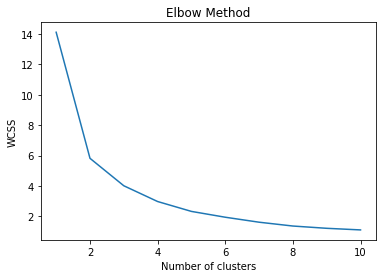

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
# X = df['width']*df['height'].dropna().values.reshape(-1, 1)
wcss = []

# Get the elbow method of no of points
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(t)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plotting Predicted Clusters

In this section we are clustering out datapoints wrt to Predicted clusters

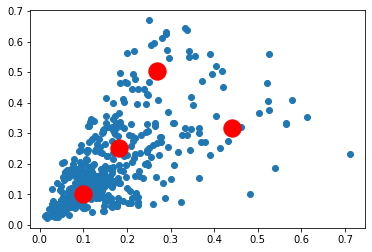

In [7]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(t)
plt.scatter(t[:,0], t[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()